### Datasets Requirements

1MB file downloaded from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

Tensor is the equivalent of a ndarray in Python

In [2]:
import torch
x=torch.Tensor (5,3)
print (x)

tensor([[1.1632e+33, 5.6003e-02, 7.0374e+22],
        [5.7453e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4569e-19],
        [6.4069e+02, 4.3066e+21, 1.1824e+22],
        [4.3066e+21, 6.3828e+28, 3.8016e-39]])


In [3]:
x=torch.rand(5,3)
print (x)

tensor([[0.1520, 0.3047, 0.4947],
        [0.6785, 0.2370, 0.7658],
        [0.0350, 0.0530, 0.0347],
        [0.7979, 0.3297, 0.1021],
        [0.6227, 0.4985, 0.0319]])


In [4]:
y=x.numpy()
print (type(y), type(x))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [5]:
# check if CUDA is available (do you have a graphics card that supports CUDA?)

In [6]:
torch.cuda.is_available()

False

In [7]:
# Move the data to a GPU

In [12]:
#x1=x.cuda()
print (x)
#print (x1)

tensor([[0.1520, 0.3047, 0.4947],
        [0.6785, 0.2370, 0.7658],
        [0.0350, 0.0530, 0.0347],
        [0.7979, 0.3297, 0.1021],
        [0.6227, 0.4985, 0.0319]])


In [13]:
x.numpy()

array([[0.15204209, 0.30470502, 0.49470627],
       [0.6785214 , 0.2370466 , 0.76582974],
       [0.03501064, 0.05300874, 0.03472   ],
       [0.79789853, 0.32967395, 0.10205132],
       [0.62267345, 0.49850088, 0.03191268]], dtype=float32)

#### Automatic Differentiation

In [16]:
actual=torch.rand(5,3).view(-1).requires_grad_(True)

In [17]:
actual

tensor([0.6298, 0.3521, 0.4537, 0.1205, 0.8280, 0.8782, 0.2868, 0.8440, 0.6601,
        0.3515, 0.5134, 0.6275, 0.6062, 0.9376, 0.0334], requires_grad=True)

In [18]:
predicted=torch.rand(5,3).view(-1).requires_grad_(True)

In [19]:
predicted

tensor([0.1865, 0.7774, 0.9701, 0.3504, 0.1728, 0.8938, 0.4636, 0.1880, 0.7035,
        0.1601, 0.0520, 0.3795, 0.2391, 0.5670, 0.0973], requires_grad=True)

In [20]:
loss=torch.sum((actual-predicted)**2)

In [21]:
loss

tensor(2.1773, grad_fn=<SumBackward0>)

In [22]:
loss.requires_grad

True

In [23]:
loss.backward()

In [24]:
loss.grad_fn

In [25]:
predicted.grad

tensor([-0.8868,  0.8507,  1.0329,  0.4596, -1.3105,  0.0312,  0.3537, -1.3120,
         0.0868, -0.3828, -0.9227, -0.4962, -0.7342, -0.7412,  0.1277])

In [26]:
2*(actual-predicted)

tensor([ 0.8868, -0.8507, -1.0329, -0.4596,  1.3105, -0.0312, -0.3537,  1.3120,
        -0.0868,  0.3828,  0.9227,  0.4962,  0.7342,  0.7412, -0.1277],
       grad_fn=<MulBackward0>)

basically what we are doing is subtractign the gradient from the original data

##### Example 2

In [27]:
x=torch.rand(15,1)
print (x)

tensor([[0.8809],
        [0.8224],
        [0.9349],
        [0.3677],
        [0.5134],
        [0.9120],
        [0.8058],
        [0.5697],
        [0.2288],
        [0.3960],
        [0.4120],
        [0.7470],
        [0.3252],
        [0.5864],
        [0.1979]])


In [28]:
m=torch.tensor(data=15.0)
m

tensor(15.)

In [29]:
c=torch.tensor(data=11.0)

In [30]:
y=m*x+c
print (y)

tensor([[24.2140],
        [23.3359],
        [25.0233],
        [16.5158],
        [18.7006],
        [24.6805],
        [23.0872],
        [19.5457],
        [14.4325],
        [16.9400],
        [17.1803],
        [22.2050],
        [15.8776],
        [19.7955],
        [13.9680]])


In [31]:
# Guess a value for m and for c
mguess=torch.tensor(1.0,requires_grad=True)
cguess=torch.tensor(0.5,requires_grad=True)

In [32]:
yhat=mguess*x+cguess

In [33]:
print (yhat)

tensor([[1.3809],
        [1.3224],
        [1.4349],
        [0.8677],
        [1.0134],
        [1.4120],
        [1.3058],
        [1.0697],
        [0.7288],
        [0.8960],
        [0.9120],
        [1.2470],
        [0.8252],
        [1.0864],
        [0.6979]], grad_fn=<AddBackward0>)


In [34]:
yhat.size()

torch.Size([15, 1])

In [35]:
losslinreg=torch.sum((yhat-y)**2)/yhat.size()[0]

In [36]:
losslinreg

tensor(358.6042, grad_fn=<DivBackward0>)

In [37]:
losslinreg.backward()

In [38]:
mguess.grad

tensor(-23.2990)

In [39]:
cguess.grad

tensor(-37.2402)

In [40]:
mguess.data

tensor(1.)

In [41]:
cguess.data

tensor(0.5000)

In [42]:
learning_rate=0.1
mguess.data.sub_(mguess.grad.data * learning_rate)
cguess.data.sub_(cguess.grad.data * learning_rate)


tensor(4.2240)

In [43]:
mguess.data

tensor(3.3299)

In [44]:
cguess.data

tensor(4.2240)

In [45]:
with torch.no_grad():
    print ( torch.sum((y-(mguess*x+cguess))**2)/yhat.size()[0])

tensor(191.7254)


#### ReLU and dropout are usually used right after a linear layer to create non-linearity

- torch.nn.ReLU(inplace=True)

Will basically replace any non-zero values with zero bringing in non-linearity
- torch.nn.Dropout(inplace=True,p=0.5)

Randomly zeros some of the activations with a probability of p from a Bernoulli distribution, helping in regularization



#### Normalization

- torch.nn.BatchNorm1d(num_features,eps=,momentum=,affine=,track_running_stats)

During training this layer keeps running estimates of its
computed mean and variance, which are then used for normalization during
evaluation. The running estimates are kept with a default :attr:`momentum`
of 0.1.


#### Convolution

- torch.nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1,padding=0)
    * kernel_size tells about the size of the convolution which is in this case 5 *  5 filter
    * We are using a stride of 1 and a padding of 0 - which means it is a 'valid' convolution
    * out_channels tells us the number of filters that we use which is in this case 6z
    


- torch.nn.MaxPool2d(kernel_size=5,stride=1,padding=0)

#### Embedding

- torch.nn.Embedding(num_embeddings=len(unique(users)),embedding_dim=50)

#### Non-Linear Activations

- torch.nn.Sigmoid()
- torch.nn.Softmax()
- torch.nn.LogSigmoid()
- torch.nn.LogSoftmax()
- torch.nn.Tanh()

# Data Engineering

## Read Files

In [46]:
# Set the path to the MovieLens 1M Dataset
PATH="ml-latest-small"

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sklearn
import datetime as dt 
import seaborn as sns
from sklearn import metrics
import torch as torch

In [48]:
# Read Ratings File

In [49]:
dfratings=pd.read_csv(f'{PATH}/ratings.csv')

In [50]:
dfratings['timestamp']=dfratings['timestamp'].apply(dt.datetime.fromtimestamp)

In [51]:
dfratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-31 00:15:03
1,1,3,4.0,2000-07-30 23:50:47
2,1,6,4.0,2000-07-31 00:07:04
3,1,47,5.0,2000-07-31 00:33:35
4,1,50,5.0,2000-07-31 00:18:51


### Exploratory Analysis: Ratings by Year

In [52]:
# Let us see the number of ratings by year
dfratings['year']=dfratings['timestamp'].dt.year.astype(int)

In [53]:
# How are the ratings distributed by year
ratings_by_year=dfratings['year'].value_counts().sort_index()
ratings_by_year=pd.DataFrame(ratings_by_year)
ratings_by_year.reset_index(inplace=True)
ratings_by_year.columns=['Year','numratings']
ratings_by_year['Year']=ratings_by_year['Year'].astype(str)

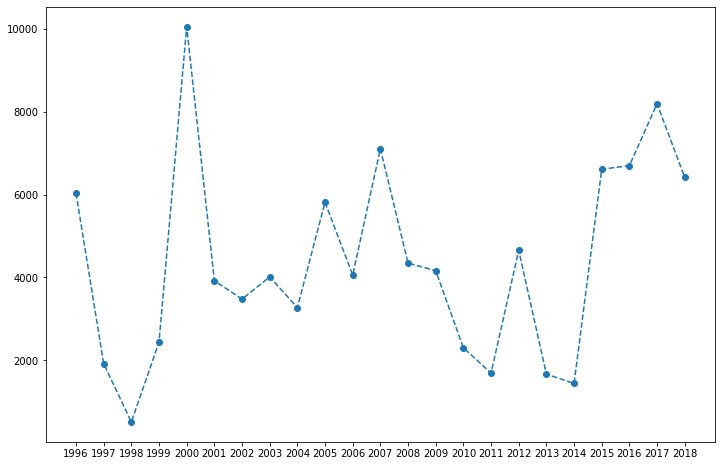

In [54]:
figure=plt.figure(figsize=(12,8))
plt.plot (ratings_by_year['Year'],ratings_by_year['numratings'],'o--')

In [55]:
dfratings['month']=dfratings['timestamp'].dt.month

In [56]:
pd.crosstab(index=dfratings['month'],columns=dfratings['year'])

year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,,,,
1,0,250,57,4,297,1106,52,501,139,1177,...,510,139,154,499,150,57,375,344,194,886
2,0,323,1,32,303,70,146,156,158,445,...,494,253,106,244,44,358,216,569,420,1233
3,58,398,130,7,779,37,94,840,218,1038,...,1083,345,85,538,57,13,89,841,549,968
4,165,219,0,0,622,160,633,47,111,969,...,137,321,23,523,196,7,207,1755,922,224
5,832,303,32,36,107,302,160,608,544,879,...,284,87,248,148,263,37,681,297,2398,939
6,882,84,43,3,1230,177,84,863,213,411,...,80,358,179,203,45,84,723,103,1909,437
7,490,70,113,4,1081,577,165,284,195,276,...,159,69,126,394,21,78,911,964,171,296
8,1010,0,119,3,2319,243,386,104,228,174,...,115,59,90,133,380,89,424,64,221,831
9,384,236,0,1,298,189,832,221,874,240,...,209,81,286,896,264,82,476,353,424,604


### Exploratory Analysis: User History in Terms of Number of Ratings

In [57]:
dfratings.sort_values(by=['userId','timestamp'],ascending=[True,True],inplace=True)

In [58]:
dfratings['seqNum']=dfratings.groupby('userId').cumcount()+1

Text(0.5, 1.0, 'History about each user that is available')

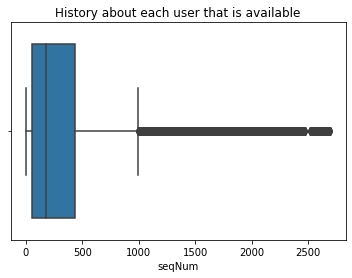

In [59]:
ax=sns.boxplot(dfratings.loc[dfratings['year']>2014,'seqNum'])
ax.set_title('History about each user that is available')

In [60]:
dfratings.loc[dfratings['seqNum']==1].year.value_counts().sort_index()

1996    97
1997    27
1998     9
1999    26
2000    48
2001    20
2002    14
2003    20
2004    11
2005    24
2006    23
2007    22
2008    22
2009    21
2010    15
2011    22
2012    25
2013    13
2014     8
2015    47
2016    32
2017    35
2018    29
Name: year, dtype: int64

### Exploratory Analysis: New Users by Year

In [61]:
temp=dfratings.loc[dfratings['seqNum']==1].year.value_counts().sort_index()

In [62]:
temp=pd.DataFrame(temp)

In [63]:
temp.head()

,year
1996,97
1997,27
1998,9
1999,26
2000,48


In [64]:
temp.reset_index(inplace=True)

In [65]:
temp.columns=['year','new_Users']

Text(0, 0.5, 'New Users')

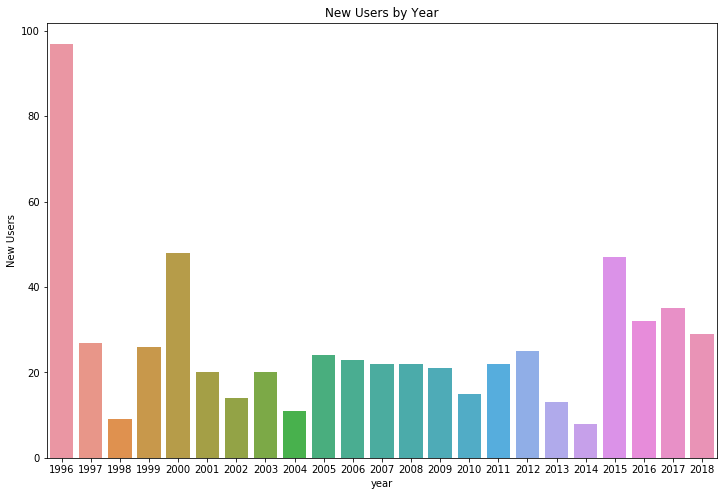

In [66]:
figure=plt.figure(figsize=(12,8))
ax=sns.barplot(x=temp['year'],y=temp['new_Users'])
ax.set_title('New Users by Year')
ax.set_ylabel ('New Users')

# Cross Validation Strategy

In [67]:
# Strategy: First 70% of the ratings per user as training and the rest as validation

In [68]:
trainfrac=0.7

In [69]:
dfmaxseqnum=dfratings.groupby('userId')['seqNum'].max()
dfmaxseqnum=pd.DataFrame(dfmaxseqnum)
dfmaxseqnum.reset_index(inplace=True)
dfmaxseqnum.columns=['userId','max_seqNum']


In [70]:
dfmaxseqnum.head()

,userId,max_seqNum
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


In [71]:
dfratings=pd.merge(dfratings,dfmaxseqnum,on='userId',how='left')

In [72]:
dfratings.head()

,userId,movieId,rating,timestamp,year,month,seqNum,max_seqNum
0,1,804,4.0,2000-07-30 23:38:19,2000,7,1,232
1,1,1210,5.0,2000-07-30 23:38:19,2000,7,2,232
2,1,2018,5.0,2000-07-30 23:38:43,2000,7,3,232
3,1,2628,4.0,2000-07-30 23:38:43,2000,7,4,232
4,1,2826,4.0,2000-07-30 23:38:43,2000,7,5,232


In [73]:
dfratings['flag_train']=np.where(dfratings['seqNum']<=trainfrac*dfratings['max_seqNum'],1,0)

In [74]:
dfratings['flag_train'].value_counts()

1    70312
0    30524
Name: flag_train, dtype: int64

In [75]:
dftrain=dfratings.loc[dfratings['flag_train']==1,:]

In [76]:
dfvalid=dfratings.loc[dfratings['flag_train']==0,:]

In [77]:
dftrain.shape

(70312, 9)

In [78]:
dfvalid.shape

(30524, 9)

# Using the Data Loader in PyTorch

In [79]:
from torch.utils import data

In [80]:
user2idx={j:i for i,j in enumerate(dftrain['userId'].unique())}
movie2idx={j:i for i,j in enumerate(dftrain['movieId'].unique())}

In [81]:
num_users=len(user2idx)
num_movies=len(movie2idx)

In [82]:
dftrain['userId']=[user2idx[i] for i in dftrain['userId']]
dftrain['movieId']=[movie2idx[i] for i in dftrain['movieId']]

/Users/rki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
dfvalid['userId']=[user2idx.get(i,num_users) for i in dfvalid['userId']]
dfvalid['movieId']=[movie2idx.get(i,num_movies) for i in dfvalid['movieId']]

/Users/rki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY):
        self.dfX,self.dfY=dfX,dfY
        
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.LongTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])
        

In [85]:
dftrain.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'year', 'month', 'seqNum',
       'max_seqNum', 'flag_train'],
      dtype='object')

In [86]:
type(dftrain['rating'])

pandas.core.series.Series

In [87]:
dftrain.reset_index(inplace=True)
dfvalid.reset_index(inplace=True)
#dftrain.to_feather(f'{PATH}/dftrain-raw')
#dfvalid.to_feather(f'{PATH}/dfvalid-raw')

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.

In [89]:
dstrain=cfdata(dftrain[['userId','movieId']],dftrain['rating'])
dsvalid=cfdata(dfvalid[['userId','movieId']],dfvalid['rating'])

## Create a DataLoader object

In [90]:
dltrain=torch.utils.data.DataLoader(dstrain,batch_size=256,shuffle=True)
dlvalid=torch.utils.data.DataLoader(dsvalid,batch_size=dfvalid.shape[0],shuffle=False) # 
#dltrainbig=torch.utils.data.DataLoader(dstrain,batch_size=dftrain.shape[0],shuffle=False)

In [91]:
dltrain

# Collaborative Filtering

In [97]:
class cf (torch.nn.Module):
    # Create network architecture
    def __init__ (self,dltrain,dlvalid,num_users,num_movies,min_rating,max_rating,num_factors=8,num_epochs=1):
        super(cf,self).__init__()
        self.dltrain,self.dlvalid,self.num_users,self.num_movies,self.num_factors,self.min_rating,self.max_rating=\
            dltrain,dlvalid,num_factors,num_users,num_movies,min_rating,max_rating
        self.u,self.i,self.ub,self.ib=torch.nn.Embedding(num_users+1,num_factors),\
            torch.nn.Embedding(num_movies+1,num_factors),torch.nn.Embedding(num_users+1,1),\
            torch.nn.Embedding(num_movies+1,1)
        self.u.weight.data.uniform_(0,0.01)
        self.i.weight.data.uniform_(0,0.01)
        self.ub.weight.data.uniform_(0,0.01)
        self.ib.weight.data.uniform_(0,0.01)
         
    
    def gradient_descent(self, num_epochs,lr, weight_decay):
        self.num_epochs,self.lr,self.weight_decay=num_epochs,lr,weight_decay
        #self.optimizer=torch.optim.Adam(self.parameters(),lr=self.lr,betas=(0.9,0.999),eps=1e-8,weight_decay=weight_decay)
        self.optimizer=torch.optim.SGD(self.parameters(),momentum=0.9,lr=self.lr,weight_decay=self.weight_decay)
        
        for epoch in range(self.num_epochs):
            
            losses=[]
            for X_batch,Y_batch in self.dltrain:
                
                   # Zero Gradients for the tensors that it will update
                self.optimizer.zero_grad()   
                # Forward Step
                result=self.forward(X_batch)#(X_batch.cuda())

                # Calculate Loss
                loss=self.calculate_loss(Y_batch,result)
                # loss=self.calculate_loss(Y_batch.cuda(),result)
                
               
                # Backward Pass
                loss.backward()

                # Update parameters
                self.optimizer.step()
                
               

                                
                losses.append(loss.item())
                
                
            # Early Stopping?
            with torch.set_grad_enabled(False):   
                for X_valid,Y_valid in self.dlvalid:
                    #validloss=self.calculate_loss(self.forward(X_valid.cuda()),Y_valid.cuda())
                    validloss=self.calculate_loss(self.forward(X_valid),Y_valid)
                    print (f'Epoch:{epoch}  Training Loss: {np.mean(losses)} Validation Loss:{validloss.item()}')
                
  
    def forward (self,X_batch):
        batch_users,batch_movies=X_batch[:,0],X_batch[:,1]
        predictions=(self.u(batch_users) * self.i(batch_movies)).sum(1)+\
            self.ub(batch_users).squeeze()+self.ib(batch_movies).squeeze()
        result=torch.sigmoid(predictions)*(self.max_rating-self.min_rating)+self.min_rating
        return result.view(-1,1)
        
    
    def calculate_loss (self,actual,prediction):
        loss=torch.sqrt(torch.nn.functional.mse_loss(prediction,actual))
        return loss
    
    

In [98]:
min_rating,max_rating=dftrain['rating'].min(),dftrain['rating'].max()

In [99]:
# results without decaying learning rate
kl=cf(dltrain,dlvalid,num_users,num_movies,min_rating,max_rating,num_factors=10)#.cuda()


In [100]:
kl.gradient_descent(num_epochs=25,lr=5e-2,weight_decay=2e-5)

Epoch:0  Training Loss: 1.1617034723541952 Validation Loss:1.08507239818573
Epoch:1  Training Loss: 1.024897913716056 Validation Loss:1.020538568496704
Epoch:2  Training Loss: 0.9688984912092036 Validation Loss:0.9886392951011658
Epoch:3  Training Loss: 0.939165398424322 Validation Loss:0.9707860350608826
Epoch:4  Training Loss: 0.920699589469216 Validation Loss:0.9579100608825684
Epoch:5  Training Loss: 0.9076999746669423 Validation Loss:0.9491401314735413
Epoch:6  Training Loss: 0.8980429632013495 Validation Loss:0.9426755309104919
Epoch:7  Training Loss: 0.8905416417121887 Validation Loss:0.9370364546775818
Epoch:8  Training Loss: 0.8844227940385991 Validation Loss:0.9325957894325256
Epoch:9  Training Loss: 0.8790056835521352 Validation Loss:0.9291061162948608
Epoch:10  Training Loss: 0.8743828415870667 Validation Loss:0.9264740943908691
Epoch:11  Training Loss: 0.8706097960472107 Validation Loss:0.9229230880737305
Epoch:12  Training Loss: 0.8672644151340831 Validation Loss:0.921782

KeyboardInterrupt: 

In [90]:
kl.gradient_descent(num_epochs=5,lr=5e-2,weight_decay=2e-5)

Epoch:0  Training Loss: 0.8409460217302496 Validation Loss:0.9061986804008484
Epoch:1  Training Loss: 0.8395277554338628 Validation Loss:0.9056211709976196
Epoch:2  Training Loss: 0.8384212901375511 Validation Loss:0.9050616025924683
Epoch:3  Training Loss: 0.8372622828050094 Validation Loss:0.9037684202194214
Epoch:4  Training Loss: 0.8361222509904341 Validation Loss:0.904682457447052


##  Cutting Training Time through Intelligent Programming

In [91]:
class cf (torch.nn.Module):
    # Create network architecture
    def __init__ (self,dltrain,dlvalid,num_users,num_movies,min_rating,max_rating,num_factors=8,num_epochs=1):
        super(cf,self).__init__()
        self.dltrain,self.dlvalid,self.num_users,self.num_movies,self.num_factors,self.min_rating,self.max_rating=\
            dltrain,dlvalid,num_factors,num_users,num_movies,min_rating,max_rating
        self.u,self.i,self.ub,self.ib=torch.nn.Embedding(num_users+1,num_factors),\
            torch.nn.Embedding(num_movies+1,num_factors),torch.nn.Embedding(num_users+1,1),\
            torch.nn.Embedding(num_movies+1,1)
        self.u.weight.data.uniform_(0,0.01)
        self.i.weight.data.uniform_(0,0.01)
        self.ub.weight.data.uniform_(0,0.01)
        self.ib.weight.data.uniform_(0,0.01)
    
  
        
    
    def gradient_descent(self, num_epochs,lr, weight_decay,lrs=None):
        self.num_epochs,self.lr,self.weight_decay=num_epochs,lr,weight_decay
        self.optimizer=torch.optim.Adam(self.parameters(),lr=self.lr,betas=(0.9,0.999),eps=1e-8,weight_decay=weight_decay)
        #self.optimizer=torch.optim.SGD(self.parameters(),momentum=0.9,lr=self.lr,weight_decay=self.weight_decay)
        
        for epoch in range(self.num_epochs):
            
            losses=[]
            batch_num=0
            for X_batch,Y_batch in self.dltrain:
                
                   # Zero Gradients for the tensors that it will update
                self.optimizer.zero_grad()   
                # Forward Step
                #result=self.forward(X_batch.cuda())
                result=self.forward(X_batch)

                # Calculate Loss
                #loss=self.calculate_loss(Y_batch.cuda(),result)
                loss=self.calculate_loss(Y_batch,result)
                
               
                # Backward Pass
                loss.backward()

                # Update parameters
                self.optimizer.step()
                
               
                if lrs is not None:
                    batch_num=batch_num+1
                    #self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=3, gamma=0.1)
                    #for param_group in self.optimizer.param_groups:
                        #param_group['lr'] = lrs[batch_num-1]
                    state_dict=self.optimizer.state_dict()
                    for param_group in state_dict['param_groups']:
                        param_group['lr']=lrs[batch_num-1]
                    self.optimizer.load_state_dict(state_dict)
                                
                losses.append(loss.item())
                
            self.losses=losses   
            # Early Stopping?
            with torch.set_grad_enabled(False):   
                for X_valid,Y_valid in self.dlvalid:
                    #validloss=self.calculate_loss(self.forward(X_valid.cuda()),Y_valid.cuda())
                    validloss=self.calculate_loss(self.forward(X_valid,Y_valid)
                    print (f'Epoch:{epoch}  Training Loss: {np.mean(losses)} Validation Loss:{validloss.item()}')
                
  
    def forward (self,X_batch):
        batch_users,batch_movies=X_batch[:,0],X_batch[:,1]
        predictions=(self.u(batch_users) * self.i(batch_movies)).sum(1)+\
            self.ub(batch_users).squeeze()+self.ib(batch_movies).squeeze()
        result=torch.sigmoid(predictions)*(self.max_rating-self.min_rating)+self.min_rating
        return result.view(-1,1)
        
    
    def calculate_loss (self,actual,prediction):
        loss=torch.sqrt(torch.nn.functional.mse_loss(prediction,actual))
        return loss
    
    

In [92]:
dltrain=torch.utils.data.DataLoader(dstrain,batch_size=64,shuffle=True)
dlvalid=torch.utils.data.DataLoader(dsvalid,batch_size=dfvalid.shape[0],shuffle=False) # 

In [93]:
kl_lr=cf(dltrain,dlvalid,num_users,num_movies,min_rating,max_rating,num_factors=10)#.cuda()

In [94]:
class LRFinder ():
    def __init__(self, kl, start_lr=1e-5, end_lr=1, num_steps=2000, linear=False):
        self.kl=kl
        ratio=end_lr/start_lr
        lr_mult=ratio/num_steps if linear else ratio ** (1/num_steps)
        lrs=[]
        lr=start_lr
        for t in range (num_steps):
            lr = t*lr_mult*start_lr if linear else lr*lr_mult
            lrs.append(lr)
        self.lrs=lrs
        kl.gradient_descent(num_epochs=1,lr=5e-2,weight_decay=2e-5,lrs=self.lrs)
        self.losses=kl.losses

In [95]:
lrf=LRFinder(kl_lr,num_steps=np.int(np.floor(dftrain.shape[0]/64)+1),linear=False)

Epoch:0  Training Loss: 1.372575767860291 Validation Loss:2.108032703399658


Text(0.05,0.75,'*')

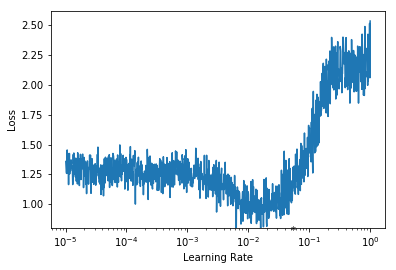

In [96]:
ax=sns.lineplot(x=lrf.lrs,y=pd.Series(lrf.losses).rolling(1).mean())
ax.set_xscale('log')
ax.set_ylabel('Loss')
ax.set_xlabel('Learning Rate')
ax.set_ylim(bottom=0.8)
ax.text(x=0.05,y=0.75,s='*')

Text(0.05,0.75,'*')

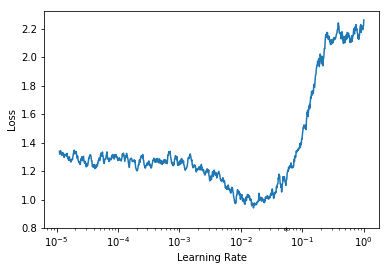

In [97]:
ax=sns.lineplot(x=lrf.lrs,y=pd.Series(lrf.losses).rolling(10).mean())
ax.set_xscale('log')
ax.set_ylabel('Loss')
ax.set_xlabel('Learning Rate')
ax.set_ylim(bottom=0.8)
ax.text(x=0.05,y=0.75,s='*')

In [98]:
lrf.losses[-5:]

[2.1330230236053467,
 2.2006585597991943,
 2.515336275100708,
 2.0598819255828857,
 2.535822629928589]

In [99]:
kl_new=cf(dltrain,dlvalid,num_users,num_movies,min_rating,max_rating,num_factors=10)#.cuda()

In [100]:
kl_new.gradient_descent(num_epochs=2,lr=1e-2,weight_decay=2e-5)

Epoch:0  Training Loss: 0.925138609695695 Validation Loss:0.8980610966682434
Epoch:1  Training Loss: 0.7983495248134186 Validation Loss:0.9027208685874939


#### Software is the king and not hardware

### Deep Network with 3 hidden Layer

In [101]:
dltrain=torch.utils.data.DataLoader(dstrain,batch_size=64,shuffle=True)
dlvalid=torch.utils.data.DataLoader(dsvalid,batch_size=dfvalid.shape[0],shuffle=False) # 

In [165]:
Image(url= "network_architecture_1.png")

Embedding -> Hidden Layer 1 (linear + Relu + Dropout) -> Hidden Layer 2 (Linear + relu + Dropout) -> Hidden Layer 3 (Linear + Logisitic) -> Linear Transformation

In [102]:
class DeepRecNet (torch.nn.Module):
    def __init__ (self,dltrain,dlvalid,num_users,num_movies,num_factors=10,num_hidden1=50,num_hidden2=10,
                  dropout_p1=0.05,dropout_p2=0.5,dropout_embedding=0.05,max_rating=5,min_rating=0.5):
        super (DeepRecNet, self).__init__()
        self.dltrain,self.dlvalid,self.num_factors,self.num_hidden1,self.num_hidden2,self.dropout_p1,self.dropout_p2=\
            dltrain,dlvalid,num_factors,num_hidden1,num_hidden2,dropout_p1,dropout_p2
        self.dropout_embedding,self.num_users,self.num_movies,self.min_rating,self.max_rating=\
        dropout_embedding,num_users,num_movies,min_rating,max_rating
        self.create_network_architecture()
        self.initialize_parameters()  
          
    def forward(self,X_batch):
        # Embedding Layer
        users=X_batch[:,0]
        movies=X_batch[:,1]
        out=torch.cat ([self.u(users),self.i(movies)],1)
        out=self.dropout_1(out)
        # Hidden Layer 1
        out=self.linear_2(out)
        out=self.relu_2(out)
        out=self.dropout_2(out)
        # Hidden Layer 2
        out=self.linear_3(out)
        out=self.dropout_3(out)
        out=self.relu_3(out)
        # Output Layer
        out=self.linear_4(out)
        out=self.logistic_4(out)
        # output
        out=out*(self.max_rating-self.min_rating)+self.min_rating
        return out.view(-1,1)
        
    def create_network_architecture(self):
        ##################################################
        ###LAYER INPUT: 
            ### EMBEDDING LAYER FOLLOWED BY DROPOUT############
            ### CONTINUOUS VARIABLES FOLLOWED BY BATCH NORMALIZATION  
        ##################################################
        # Embedding Layers
        self.u=torch.nn.Embedding(self.num_users+1,self.num_factors)
        self.i=torch.nn.Embedding(self.num_movies+1,self.num_factors)
        # Dropout for embedding layers
        self.dropout_1=torch.nn.Dropout(self.dropout_embedding)
        ##################################################
        ###LAYER 2: LINEAR LAYER FOLLOWED BY RELU############
        ##################################################
        self.linear_2=torch.nn.Linear(self.num_factors*2,self.num_hidden1,bias=True)
        self.relu_2=torch.nn.ReLU()
        self.dropout_2=torch.nn.Dropout(self.dropout_p1)
        ##################################################
        ###LAYER 3: LINEAR LAYER FOLLOWED BY RELU############
        ##################################################
        self.linear_3=torch.nn.Linear(self.num_hidden1,self.num_hidden2,bias=True)
        self.relu_3=torch.nn.ReLU()
        self.dropout_3=torch.nn.Dropout(self.dropout_p2)        
        #######################################################
        ##OUTPUT: LINEAR FOLLOWED BY LOGISTIC
        ####################################################
        self.linear_4=torch.nn.Linear(self.num_hidden2,1)
        self.logistic_4=torch.nn.Sigmoid()
       

    def calculate_loss (self,actual,prediction):
        loss=torch.sqrt(torch.nn.functional.mse_loss(prediction,actual))
        return loss
    def initialize_parameters(self):
        self.u.weight.data.uniform_(0,0.001)
        self.i.weight.data.uniform_(0,0.001)
        torch.nn.init.normal_(self.linear_2.weight,0,0.001)
        torch.nn.init.normal_(self.linear_3.weight,0,0.001)
        torch.nn.init.normal_(self.linear_4.weight,0,0.001)
        
    def gradient_descent(self, num_epochs,lr, weight_decay,lrs=None):
        self.num_epochs,self.lr,self.weight_decay=num_epochs,lr,weight_decay
        self.optimizer=torch.optim.Adam(self.parameters(),lr=self.lr,betas=(0.9,0.999),eps=1e-8,weight_decay=weight_decay)
        #self.optimizer=torch.optim.SGD(self.parameters(),momentum=0.9,lr=self.lr,weight_decay=self.weight_decay)
        for epoch in range(self.num_epochs):
            losses=[]
            batch_num=0
            for X_batch,Y_batch in self.dltrain:
                   # Zero Gradients for the tensors that it will update
                self.optimizer.zero_grad()   
                # Forward Step
                #result=self.forward(X_batch.cuda())
                result=self.forward(X_batch)
                # Calculate Loss
                #loss=self.calculate_loss(Y_batch.cuda(),result) 
                loss=self.calculate_loss(Y_batch,result) 
                # Backward Pass
                loss.backward()
                # Update parameters
                self.optimizer.step()
                if lrs is not None:
                    batch_num=batch_num+1
                    #self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=3, gamma=0.1)
                    #for param_group in self.optimizer.param_groups:
                        #param_group['lr'] = lrs[batch_num-1]
                    state_dict=self.optimizer.state_dict()
                    for param_group in state_dict['param_groups']:
                        param_group['lr']=lrs[batch_num-1]
                    self.optimizer.load_state_dict(state_dict)
                                
                losses.append(loss.item())
                
            self.losses=losses   
            # Early Stopping?
            with torch.set_grad_enabled(False):   
                for X_valid,Y_valid in self.dlvalid:
                    #validloss=self.calculate_loss(self.forward(X_valid.cuda()),Y_valid.cuda())
                    validloss=self.calculate_loss(self.forward(X_valid,Y_valid)                   
                    print (f'Epoch:{epoch}  Training Loss: {np.mean(losses)} Validation Loss:{validloss.item()}') 
  

In [121]:
class LRFinder ():
    def __init__(self, kl, start_lr=1e-5, end_lr=1, weight_decay=5e-4, num_steps=2000, linear=False):
        self.kl=kl
        ratio=end_lr/start_lr
        lr_mult=ratio/num_steps if linear else ratio ** (1/num_steps)
        lrs=[]
        lr=start_lr
        for t in range (num_steps):
            lr = t*lr_mult*start_lr if linear else lr*lr_mult
            lrs.append(lr)
        self.lrs=lrs
        kl.gradient_descent(num_epochs=1,lr=5e-2,weight_decay=weight_decay,lrs=self.lrs)
        self.losses=kl.losses

In [140]:
#net2=KiranContentNet(cfobj,num_factors=150,num_hidden1=400,num_hidden2=200,num_hidden3=100,dropout_p1=0.1,dropout_p2=0.05,dropout_embedding=0.05).cuda()
net2=DeepRecNet(dltrain,dlvalid,num_users,num_movies,num_factors=100,num_hidden1=50,num_hidden2=25,dropout_p1=0.25,
                dropout_p2=0.1,dropout_embedding=0.01,min_rating=min_rating,max_rating=max_rating)#.cuda()


In [141]:
lrf=LRFinder(net2,num_steps=np.int(np.floor(dftrain.shape[0]/64)+1),linear=False,end_lr=0.25)

Epoch:0  Training Loss: 1.0583394899815186 Validation Loss:1.5715316534042358


Text(0.05,0.75,'*')

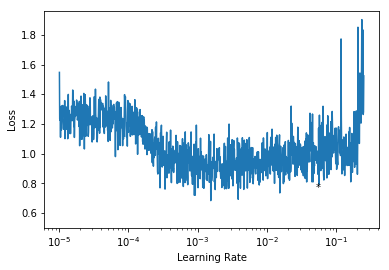

In [147]:
ax=sns.lineplot(x=lrf.lrs,y=pd.Series(lrf.losses).rolling(1).mean())
ax.set_xscale('log')
ax.set_ylabel('Loss')
ax.set_xlabel('Learning Rate')
ax.set_ylim(bottom=0.5)
ax.text(x=0.05,y=0.75,s='*')

Text(0.05,0.75,'*')

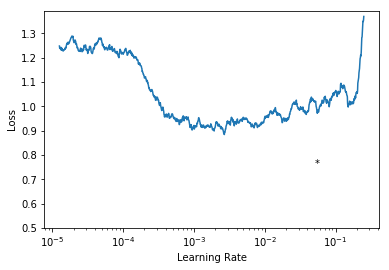

In [148]:
ax=sns.lineplot(x=lrf.lrs,y=pd.Series(lrf.losses).rolling(25).mean())
ax.set_xscale('log')
ax.set_ylabel('Loss')
ax.set_xlabel('Learning Rate')
ax.set_ylim(bottom=0.5)
ax.text(x=0.05,y=0.75,s='*')

In [146]:
#net2=KiranContentNet(cfobj,num_factors=150,num_hidden1=400,num_hidden2=200,num_hidden3=100,dropout_p1=0.1,dropout_p2=0.05,dropout_embedding=0.05).cuda()
net2=DeepRecNet(dltrain,dlvalid,num_users,num_movies,num_factors=100,num_hidden1=50,num_hidden2=25,dropout_p1=0.25,
                dropout_p2=0.1,dropout_embedding=0.01,min_rating=min_rating,max_rating=max_rating)#.cuda()
net2.gradient_descent (num_epochs=5,lr=5e-3, weight_decay=5e-4)

Epoch:0  Training Loss: 0.9323789009839649 Validation Loss:0.9321234226226807
Epoch:1  Training Loss: 0.8947621313846578 Validation Loss:0.9349735975265503
Epoch:2  Training Loss: 0.8799132682498311 Validation Loss:0.9240941405296326
Epoch:3  Training Loss: 0.8681767171247099 Validation Loss:0.9191564917564392
Epoch:4  Training Loss: 0.8617765226073434 Validation Loss:0.9106886982917786


In [149]:
net2.gradient_descent (num_epochs=5,lr=5e-3, weight_decay=5e-4)

Epoch:0  Training Loss: 0.8830427918464515 Validation Loss:0.9215103983879089
Epoch:1  Training Loss: 0.8604642599685502 Validation Loss:0.9090440273284912
Epoch:2  Training Loss: 0.8556811295931073 Validation Loss:0.908053994178772
Epoch:3  Training Loss: 0.8546677569674838 Validation Loss:0.9125334620475769
Epoch:4  Training Loss: 0.8535092539739565 Validation Loss:0.9110316038131714


## Different Deep Net Architecture

In [150]:
num_users

610

In [151]:
num_movies

7525

In [152]:
class DeepRecNet (torch.nn.Module):
    def __init__ (self,dltrain,dlvalid,num_users,num_movies,num_factors_users,num_factors_movies,num_hidden1=50,num_hidden2=10,
                  num_hidden3=5,dropout_p1=0.05,dropout_p2=0.5,dropout_embedding=0.05,max_rating=5,min_rating=0.5):
        super (DeepRecNet, self).__init__()
        self.dltrain,self.dlvalid,self.num_factors_users,self.num_factors_movies,self.num_hidden1,self.num_hidden2,self.num_hidden3,self.dropout_p1,self.dropout_p2=\
            dltrain,dlvalid,num_factors_users,num_factors_movies,num_hidden1,num_hidden2,num_hidden3,dropout_p1,dropout_p2
        self.dropout_embedding,self.num_users,self.num_movies,self.min_rating,self.max_rating=\
        dropout_embedding,num_users,num_movies,min_rating,max_rating
        self.create_network_architecture()
        self.initialize_parameters()  
          
    def forward(self,X_batch):
        # Embedding Layer
        users=X_batch[:,0]
        movies=X_batch[:,1]
        out=torch.cat ([self.u(users),self.i(movies)],1)
        out=self.dropout_1(out)
        # Hidden Layer 1
        out=self.linear_2(out)
        out=self.relu_2(out)
        # Hidden Layer 2
        out=self.linear_3(out)
        out=self.dropout_3(out)
        # Hidden Layer 3
        out=self.linear_4(out)
        out=self.relu_4(out)
        # Output Layer
        out=self.linear_5(out)
        out=self.logistic_5(out)
        # output
        out=out*(self.max_rating-self.min_rating)+self.min_rating
        return out.view(-1,1)
        
    def create_network_architecture(self):
        ##################################################
        ###LAYER INPUT: 
            ### EMBEDDING LAYER FOLLOWED BY DROPOUT############
            ### CONTINUOUS VARIABLES FOLLOWED BY BATCH NORMALIZATION  
        ##################################################
        # Embedding Layers
        self.u=torch.nn.Embedding(self.num_users+1,self.num_factors_users)
        self.i=torch.nn.Embedding(self.num_movies+1,self.num_factors_movies)
        # Dropout for embedding layers
        self.dropout_1=torch.nn.Dropout(self.dropout_embedding)
        ##################################################
        ###LAYER 2: LINEAR LAYER FOLLOWED BY RELU############
        ##################################################
        self.linear_2=torch.nn.Linear(self.num_factors_users+self.num_factors_movies,self.num_hidden1,bias=True)
        self.relu_2=torch.nn.ReLU()
        ##################################################
        ###LAYER 3: LINEAR LAYER FOLLOWED BY DROPOUT############
        ##################################################
        self.linear_3=torch.nn.Linear(self.num_hidden1,self.num_hidden2,bias=True)
        self.dropout_3=torch.nn.Dropout(self.dropout_p1)    
        ##################################################
        ###LAYER 4: LINEAR LAYER FOLLOWED BY RELU############
        ##################################################
        self.linear_4=torch.nn.Linear(self.num_hidden2,self.num_hidden3,bias=True)
        self.relu_4=torch.nn.ReLU()
        #######################################################
        ##OUTPUT: LINEAR FOLLOWED BY LOGISTIC
        ####################################################
        self.linear_5=torch.nn.Linear(self.num_hidden3,1)
        self.logistic_5=torch.nn.Sigmoid()
       

    def calculate_loss (self,actual,prediction):
        loss=torch.sqrt(torch.nn.functional.mse_loss(prediction,actual))
        return loss
    def initialize_parameters(self):
        self.u.weight.data.uniform_(0,0.001)
        self.i.weight.data.uniform_(0,0.001)
        torch.nn.init.normal_(self.linear_2.weight,0,0.001)
        torch.nn.init.normal_(self.linear_3.weight,0,0.001)
        torch.nn.init.normal_(self.linear_4.weight,0,0.001)
        
    def gradient_descent(self, num_epochs,lr, weight_decay,lrs=None):
        self.num_epochs,self.lr,self.weight_decay=num_epochs,lr,weight_decay
        self.optimizer=torch.optim.Adam(self.parameters(),lr=self.lr,betas=(0.9,0.999),eps=1e-8,weight_decay=weight_decay)
        #self.optimizer=torch.optim.SGD(self.parameters(),momentum=0.9,lr=self.lr,weight_decay=self.weight_decay)
        for epoch in range(self.num_epochs):
            losses=[]
            batch_num=0
            for X_batch,Y_batch in self.dltrain:
                   # Zero Gradients for the tensors that it will update
                self.optimizer.zero_grad()   
                # Forward Step
                result=self.forward(X_batch)#.cuda())
                # Calculate Loss
                #loss=self.calculate_loss(Y_batch.cuda(),result)    
                loss=self.calculate_loss(Y_batch,result)              
               
                # Backward Pass
                loss.backward()
                # Update parameters
                self.optimizer.step()
                if lrs is not None:
                    batch_num=batch_num+1
                    #self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=3, gamma=0.1)
                    #for param_group in self.optimizer.param_groups:
                        #param_group['lr'] = lrs[batch_num-1]
                    state_dict=self.optimizer.state_dict()
                    for param_group in state_dict['param_groups']:
                        param_group['lr']=lrs[batch_num-1]
                    self.optimizer.load_state_dict(state_dict)
                                
                losses.append(loss.item())
                
            self.losses=losses   
            # Early Stopping?
            with torch.set_grad_enabled(False):   
                for X_valid,Y_valid in self.dlvalid:
                    #validloss=self.calculate_loss(self.forward(X_valid.cuda()),Y_valid.cuda())
                    validloss=self.calculate_loss(self.forward(X_valid,Y_valid)
                    print (f'Epoch:{epoch}  Training Loss: {np.mean(losses)} Validation Loss:{validloss.item()}') 
  

In [153]:
net3=DeepRecNet(dltrain,dlvalid,num_users,num_movies,num_factors_users=100,num_factors_movies=200,
                num_hidden1=150,num_hidden2=75,num_hidden3=10,dropout_p1=0.25,
                dropout_p2=0.25,dropout_embedding=0.01,min_rating=min_rating,max_rating=max_rating)#.cuda()

In [155]:
lrf=LRFinder(net3,num_steps=np.int(np.floor(dftrain.shape[0]/64)+1),linear=False,end_lr=0.25,weight_decay=5e-4)

Epoch:0  Training Loss: 1.0790557637878502 Validation Loss:1.0603982210159302


Text(0.05,0.75,'*')

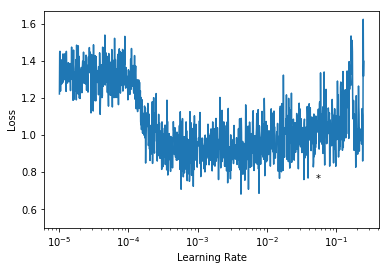

In [157]:
ax=sns.lineplot(x=lrf.lrs,y=pd.Series(lrf.losses).rolling(1).mean())
ax.set_xscale('log')
ax.set_ylabel('Loss')
ax.set_xlabel('Learning Rate')
ax.set_ylim(bottom=0.5)
ax.text(x=0.05,y=0.75,s='*')

Text(0.05,0.75,'*')

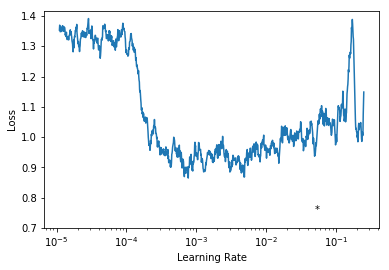

In [159]:
ax=sns.lineplot(x=lrf.lrs,y=pd.Series(lrf.losses).rolling(10).mean())
ax.set_xscale('log')
ax.set_ylabel('Loss')
ax.set_xlabel('Learning Rate')
ax.set_ylim(bottom=0.7)
ax.text(x=0.05,y=0.75,s='*')

In [162]:
net3=DeepRecNet(dltrain,dlvalid,num_users,num_movies,num_factors_users=100,num_factors_movies=200,
                num_hidden1=150,num_hidden2=75,num_hidden3=10,dropout_p1=0.25,
                dropout_p2=0.25,dropout_embedding=0.01,min_rating=min_rating,max_rating=max_rating)#.cuda()
net3.gradient_descent (num_epochs=5,lr=2e-3, weight_decay=5e-4)

Epoch:0  Training Loss: 0.9208805608792778 Validation Loss:0.9288872480392456
Epoch:1  Training Loss: 0.8799118380095332 Validation Loss:0.913957417011261
Epoch:2  Training Loss: 0.8595516952305517 Validation Loss:0.9045547246932983
Epoch:3  Training Loss: 0.8449917543574395 Validation Loss:0.8942424654960632
Epoch:4  Training Loss: 0.831372049909163 Validation Loss:0.8948850631713867


In [163]:
Image(url= "network_architecture.png")

## Heuristic Methods

### Global  Average

In [47]:
global_average_rating=dftrain['rating'].mean()

In [48]:
df=dfvalid.copy()
actual=df['rating']
df['prediction']=global_average_rating
mse_score=metrics.mean_squared_error(df['rating'],df['prediction'])
r2_score=metrics.r2_score(df['rating'],df['prediction'])

In [50]:
print (f'MSE: {mse_score}, R2: {r2_score}')

MSE: 1.1166294001480062, R2: -0.003951506926251236


### Global User Average

In [55]:
global_user_average_rating=dftrain.groupby('userId')['rating'].mean()

In [56]:
df=dfvalid.copy()
actual=df['rating']
temp=pd.DataFrame(data=global_user_average_rating, index=global_user_average_rating.index)
temp=pd.merge(df,temp,left_on='userId',right_index=True,how='left',suffixes=['_actual','_pred'])
temp['rating_pred'].fillna(global_average_rating,inplace=True)
prediction=temp['rating_pred']
mse_score=metrics.mean_squared_error(actual,prediction)
r2_score=metrics.r2_score(actual,prediction)

In [57]:
print (f'MSE: {mse_score}, R2: {r2_score}')

MSE: 0.9361412779041992, R2: 0.15832374955986828


### Global Item Average

In [54]:
global_item_average_rating=dftrain.groupby('movieId')['rating'].mean()

In [59]:
df=dfvalid.copy()
actual=df['rating']
temp=pd.DataFrame(data=global_item_average_rating, index=global_item_average_rating.index)
temp=pd.merge(df,temp,left_on='movieId',right_index=True,how='left',suffixes=['_actual','_pred'])
temp['rating_pred'].fillna(global_average_rating,inplace=True)
prediction=temp['rating_pred']
mse_score=metrics.mean_squared_error(actual,prediction)
r2_score=metrics.r2_score(actual,prediction)

In [60]:
print (f'MSE: {mse_score}, R2: {r2_score}')

MSE: 1.0356573408135799, R2: 0.06884974743526229
